## Logistic Regression Intro

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [14]:
raw_data = pd.read_csv('Admittance.csv')

raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [3]:
data = raw_data.copy()

data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})

data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [4]:
y = data['Admitted']

x1 = data['SAT']

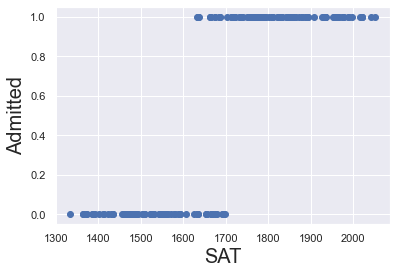

In [5]:
plt.scatter(x1, y, color='C0')

plt.xlabel('SAT', fontsize=20)

plt.ylabel('Admitted', fontsize=20)

plt.show()

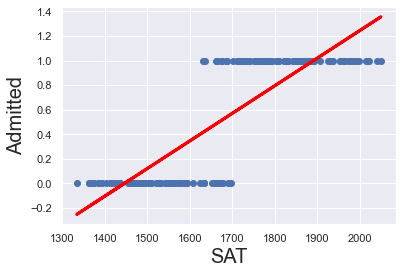

In [6]:
x = sm.add_constant(x1)

reg_line = sm.OLS(y,x)

results_line = reg_line.fit()

plt.scatter(x1, y, color = 'C0')

y_hat = x1*results_line.params[1] + results_line.params[0]

# What do you think about "results_line.params[1]"???

plt.plot(x1,y_hat, lw=3, color='red')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)

plt.show()

In [7]:
results_line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           2.98e-43
Time:                        13:42:31   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
results_line.params[1], results_line.params[0]

(0.0022482399779685663, -3.2518585426506874)

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


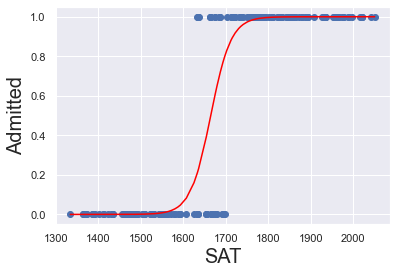

In [9]:
reg_log = sm.Logit(y,x)

results_log = reg_log.fit()

def f(x, b0, b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))

x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize=20)
plt.plot(x_sorted, f_sorted, color='red')
plt.show()

In [10]:
np.array(x1), x_sorted

(array([1363, 1792, 1954, 1653, 1593, 1755, 1775, 1887, 1893, 1580, 1857,
        1880, 1664, 1364, 1693, 1850, 1633, 1634, 1636, 1855, 1987, 1997,
        1422, 1508, 1720, 1879, 1634, 1802, 1849, 1764, 1460, 1675, 1656,
        2020, 1850, 1865, 1664, 1872, 1654, 1393, 1587, 1631, 1931, 1370,
        1810, 1414, 1761, 1477, 1486, 1561, 1549, 2050, 1697, 1543, 1934,
        1385, 1670, 1735, 1634, 1777, 1550, 1715, 1925, 1842, 1786, 1435,
        1387, 1521, 1975, 1435, 1714, 1634, 1464, 1794, 1855, 1953, 1469,
        1663, 1907, 1990, 1542, 1808, 1966, 1679, 2021, 2015, 1473, 1979,
        1787, 1687, 1674, 1478, 1735, 1720, 1494, 1964, 1843, 1550, 1764,
        1712, 1775, 1531, 1781, 1579, 1526, 1778, 1769, 1824, 1481, 1464,
        1591, 1666, 1455, 1934, 1625, 1334, 1721, 1475, 1662, 1861, 1936,
        1572, 1508, 1430, 1891, 1550, 1741, 1690, 1687, 1730, 1674, 1475,
        1962, 1532, 1492, 1502, 1974, 1607, 1412, 1557, 1821, 1760, 1685,
        1773, 1826, 1565, 1510, 1374, 

In [11]:
f(x1, results_log.params[0], results_log.params[1])

array([3.17509804e-06, 9.95320711e-01, 9.99994789e-01, 3.82545559e-01,
       4.74688306e-02, 9.78241219e-01, 9.90489815e-01, 9.99913075e-01,
       9.99932439e-01, 2.80555331e-02, 9.99693576e-01, 9.99883365e-01,
       4.95824098e-01, 3.31130788e-06, 7.68780343e-01, 9.99588875e-01,
       2.11008877e-01, 2.18086901e-01, 2.32751342e-01, 9.99666730e-01,
       9.99998697e-01, 9.99999144e-01, 3.78484857e-05, 1.40058570e-03,
       9.11780281e-01, 9.99878362e-01, 2.18086901e-01, 9.96920696e-01,
       9.99571245e-01, 9.84988046e-01, 1.86723145e-04, 6.09532977e-01,
       4.12717426e-01, 9.99999674e-01, 9.99588875e-01, 9.99781012e-01,
       4.95824098e-01, 9.99836790e-01, 3.92515016e-01, 1.11951035e-05,
       3.72881439e-02, 1.97361936e-01, 9.99986307e-01, 4.26043595e-06,
       9.97797608e-01, 2.70466415e-05, 9.83006220e-01, 3.81272805e-04,
       5.56342322e-04, 1.28281107e-02, 7.78868807e-03, 9.99999908e-01,
       7.97292345e-01, 6.06406209e-03, 9.99987928e-01, 7.99999369e-06,
      

In [12]:
 f_sorted

array([9.39130917e-07, 3.17509804e-06, 3.31130788e-06, 4.26043595e-06,
       5.03991985e-06, 7.99999369e-06, 8.70110288e-06, 1.11951035e-05,
       1.63383507e-05, 2.48673397e-05, 2.70466415e-05, 3.78484857e-05,
       5.29641245e-05, 6.53414596e-05, 6.53414596e-05, 1.51356511e-04,
       1.86723145e-04, 1.94731925e-04, 2.20878399e-04, 2.20878399e-04,
       2.72485399e-04, 3.22323161e-04, 3.50561492e-04, 3.50561492e-04,
       3.81272805e-04, 3.97622735e-04, 4.50998879e-04, 5.56342322e-04,
       5.80195312e-04, 7.15694599e-04, 7.78368880e-04, 1.08890584e-03,
       1.40058570e-03, 1.40058570e-03, 1.52314535e-03, 2.41557378e-03,
       2.73909368e-03, 2.97843145e-03, 3.67195895e-03, 3.82888121e-03,
       5.81606838e-03, 6.06406209e-03, 7.78868807e-03, 8.12010613e-03,
       8.12010613e-03, 8.12010613e-03, 9.99886535e-03, 9.99886535e-03,
       1.08656392e-02, 1.28281107e-02, 1.51396041e-02, 2.02101782e-02,
       2.69325537e-02, 2.80555331e-02, 3.72881439e-02, 4.38114775e-02,
      